# Timor Country

In [39]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [40]:
menhap_df = pd.read_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/final_data.xlsx")
menhap_df

,country,year,Schizophrenia,Bipolar,Eating_Disorders,Anxiety,Drug_Use,Depression,Alcohol_Use,Life_Ladder,Log_GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Positive_Affect,Negative_Affect,Ladder_Std_Dev,GINI_Index
0,Brunei,1990,0.274544,0.617719,0.550731,3.548453,0.911231,2.577977,0.771017,6.233732,10.826301,0.790585,70.994705,0.767580,0.073472,0.062403,0.569497,0.166263,2.052102,0.622453
1,Brunei,1991,0.273819,0.618347,0.548010,3.554565,0.910156,2.562828,0.770862,6.437663,11.145486,0.793567,73.141360,0.789073,0.054550,0.226984,0.550824,0.112444,2.006036,0.584078
2,Brunei,1992,0.273212,0.618986,0.545544,3.561621,0.910287,2.551382,0.770430,6.586561,10.776199,0.823234,73.563922,0.787172,0.043634,0.148619,0.712836,0.185052,2.053332,0.560275
3,Brunei,1993,0.272736,0.619673,0.543644,3.569155,0.910409,2.543804,0.769584,6.821280,11.119712,0.811811,71.970894,0.801130,0.071169,0.054491,0.472039,0.127140,2.031076,0.612157
4,Brunei,1994,0.272383,0.620342,0.542626,3.576319,0.908915,2.538465,0.768343,6.192638,10.400065,0.752147,73.270498,0.705897,0.086336,0.107812,0.650715,0.138546,2.073008,0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vietnam,2013,0.241026,0.550479,0.119353,2.039645,0.673579,2.884934,1.722689,5.022699,8.541249,0.759477,65.545815,0.919607,-0.024637,0.771246,0.718431,0.165225,1.404304,0.381849
304,Vietnam,2014,0.241883,0.551005,0.121583,2.045305,0.677829,2.882767,1.728448,5.084923,8.588622,0.792168,65.677925,0.845240,0.002126,0.779896,0.701386,0.240607,1.769163,0.414816
305,Vietnam,2015,0.242783,0.551548,0.123609,2.051937,0.682933,2.881750,1.733233,5.076315,8.642591,0.848677,65.810028,0.897333,0.087220,0.747188,0.642237,0.232416,1.794858,0.398138
306,Vietnam,2016,0.243709,0.552084,0.126256,2.059037,0.687896,2.879813,1.736929,5.062267,8.692120,0.876324,65.942139,0.894351,-0.088430,0.799240,0.536226,0.222550,1.767819,0.375812


In [41]:
menhap_df.dtypes

country                object
year                    int64
Schizophrenia         float64
Bipolar               float64
Eating_Disorders      float64
Anxiety               float64
Drug_Use              float64
Depression            float64
Alcohol_Use           float64
Life_Ladder           float64
Log_GDP_per_Capita    float64
Social_Support        float64
Life_Expectancy       float64
Freedom               float64
Generosity            float64
Corruption            float64
Positive_Affect       float64
Negative_Affect       float64
Ladder_Std_Dev        float64
GINI_Index            float64
dtype: object

In [42]:
lifeladder_df = menhap_df.loc[:, ["year", 'country', 'Life_Ladder']]
lifeladder_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
...,...,...,...
303,2013,Vietnam,5.022699
304,2014,Vietnam,5.084923
305,2015,Vietnam,5.076315
306,2016,Vietnam,5.062267


In [43]:
# Mengambil data untuk country tertentu
timor_df = lifeladder_df.loc[lifeladder_df['country'] == 'Timor']
timor_df['year'] = pd.to_datetime(timor_df['year'], format='%Y')
timor_df = pd.Series(timor_df['Life_Ladder'].values, index=timor_df.year, name='Life_Ladder')
timor_df.index = pd.DatetimeIndex(timor_df.index, 
                                      freq=timor_df.index.inferred_freq)

timor_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_984\1577452481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timor_df['year'] = pd.to_datetime(timor_df['year'], format='%Y')


year
1990-01-01    4.553214
1991-01-01    5.187320
1992-01-01    4.762446
1993-01-01    4.325523
1994-01-01    4.395901
1995-01-01    5.117449
1996-01-01    4.931013
1997-01-01    5.034522
1998-01-01    4.365290
1999-01-01    5.071599
2000-01-01    4.372630
2001-01-01    4.459428
2002-01-01    4.248438
2003-01-01    4.375386
2004-01-01    4.350572
2005-01-01    5.372947
2006-01-01    5.104531
2007-01-01    4.105674
2008-01-01    4.552786
2009-01-01    4.863210
2010-01-01    5.275966
2011-01-01    5.089886
2012-01-01    4.643284
2013-01-01    5.237189
2014-01-01    5.443471
2015-01-01    5.015366
2016-01-01    5.353903
2017-01-01    4.911435
Freq: AS-JAN, Name: Life_Ladder, dtype: float64

In [44]:
timor_list = timor_df.tolist()
timor_list

[4.553214157676135,
 5.187320030598047,
 4.762446380843111,
 4.325522908286716,
 4.395901359212828,
 5.11744878125668,
 4.931012986750818,
 5.034521966868728,
 4.365290486450857,
 5.071598632202178,
 4.372629781023447,
 4.459428335354167,
 4.248437742363563,
 4.375386343737382,
 4.350571801909671,
 5.372946653617666,
 5.1045312249,
 4.1056743124,
 4.5527864429,
 4.863210321,
 5.2759659048,
 5.0898862083,
 4.6432837728,
 5.2371893385,
 5.4434705582,
 5.0153655889,
 5.353903414750805,
 4.911434868784958]

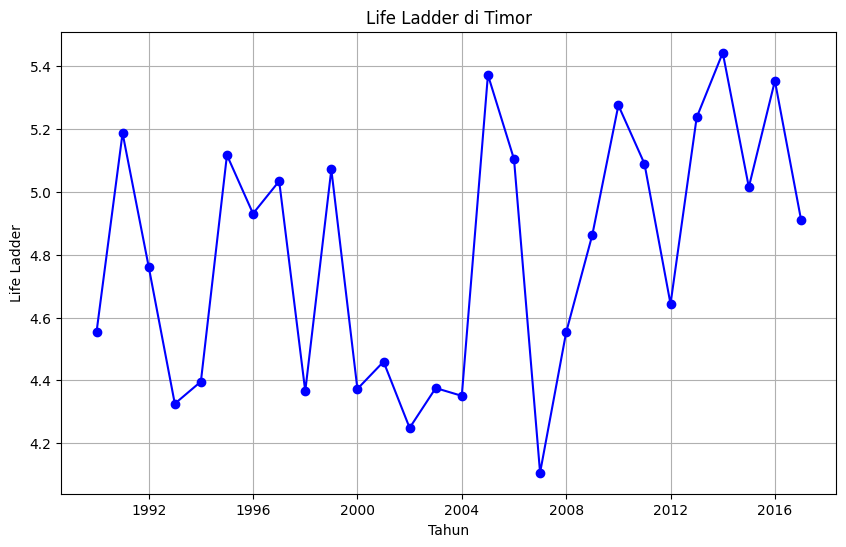

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(timor_df.index, timor_list, marker='o', linestyle='-', color='b')
plt.title('Life Ladder di Timor')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

### model SES

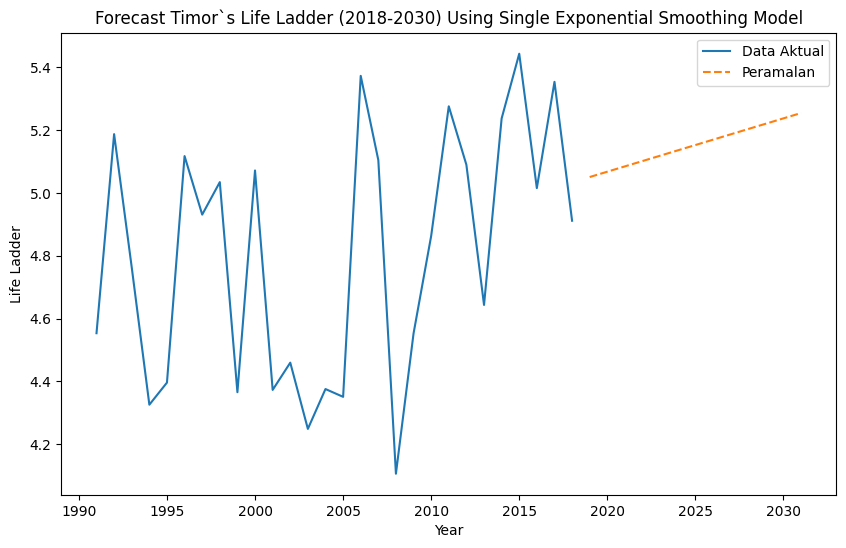

            forecast
2018-12-31  5.050681
2019-12-31  5.067673
2020-12-31  5.084665
2021-12-31  5.101657
2022-12-31  5.118649
2023-12-31  5.135642
2024-12-31  5.152634
2025-12-31  5.169626
2026-12-31  5.186618
2027-12-31  5.203610
2028-12-31  5.220602
2029-12-31  5.237594
2030-12-31  5.254586


In [46]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(timor_list), freq='Y')
life_ladder_series = pd.Series(timor_list, index=years)

# Buat model Exponential Smoothing
model = ExponentialSmoothing(life_ladder_series, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Buat prediksi untuk beberapa tahun ke depan
forecast_steps = 13
forecast = fit.forecast(steps=forecast_steps)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(forecast, label='Peramalan', linestyle='--')
plt.legend(loc='best')
plt.title('Forecast Timor`s Life Ladder (2018-2030) Using Single Exponential Smoothing Model')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
forecast_years = pd.date_range(start=years[-1] + pd.offsets.YearBegin(), periods=forecast_steps, freq='Y')
forecast_df = pd.DataFrame({'forecast': forecast})

print(forecast_df)

forecast_df.to_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/hasil_forecast/timor_for_ses.xlsx", index=False)


### Moving Average

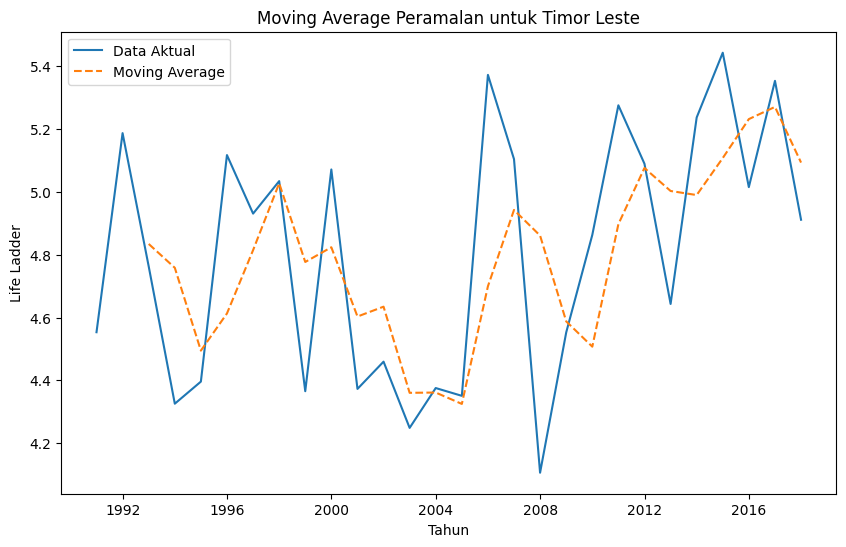

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(timor_list), freq='Y')
life_ladder_series = pd.Series(timor_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 3
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Timor Leste')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

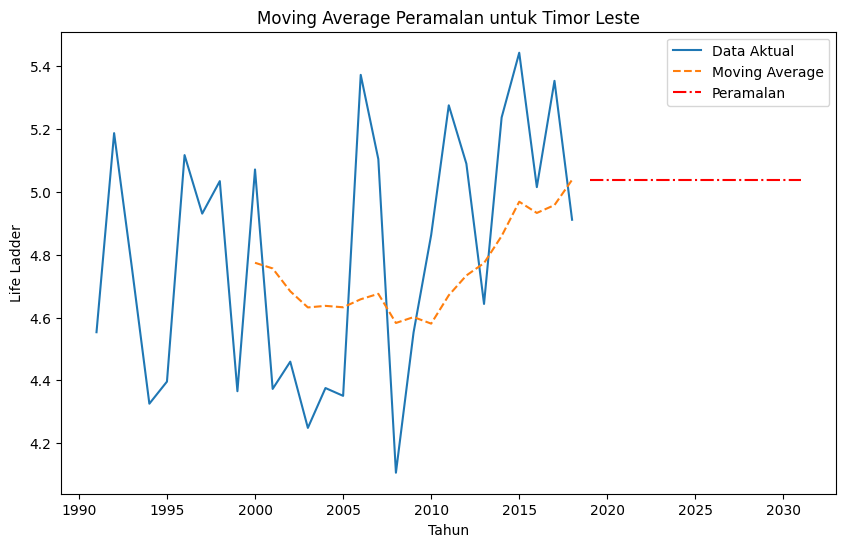

            forecast
year                
2018-12-31   5.03865
2019-12-31   5.03865
2020-12-31   5.03865
2021-12-31   5.03865
2022-12-31   5.03865
2023-12-31   5.03865
2024-12-31   5.03865
2025-12-31   5.03865
2026-12-31   5.03865
2027-12-31   5.03865
2028-12-31   5.03865
2029-12-31   5.03865
2030-12-31   5.03865


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(timor_list), freq='Y')
life_ladder_series = pd.Series(timor_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 10 tahun)
window_size = 10
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Prediksi 10 tahun ke depan
last_moving_avg = moving_average.iloc[-1]
forecast_years = pd.date_range(start=life_ladder_series.index[-1] + pd.DateOffset(years=1), periods=13, freq='Y')
forecast_values = np.full(13, last_moving_avg)

# Buat DataFrame untuk prediksi
forecast_ma = pd.DataFrame({'year': forecast_years, 'forecast': forecast_values})
forecast_ma.set_index('year', inplace=True)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.plot(forecast_ma, label='Peramalan', linestyle='-.', color='red')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Timor Leste')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
print(forecast_ma)

### linear regresion

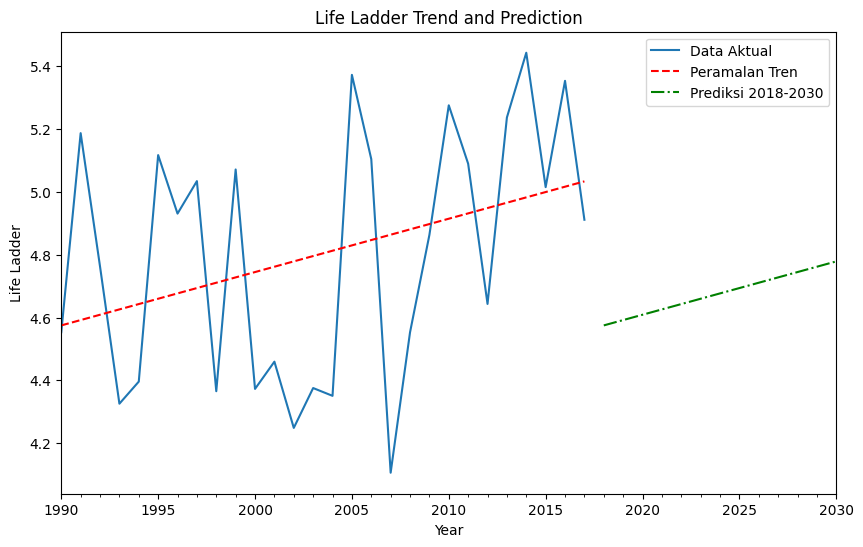

2018-12-31    4.574905
2019-12-31    4.591897
2020-12-31    4.608889
2021-12-31    4.625881
2022-12-31    4.642873
2023-12-31    4.659866
2024-12-31    4.676858
2025-12-31    4.693850
2026-12-31    4.710842
2027-12-31    4.727834
2028-12-31    4.744827
2029-12-31    4.761819
2030-12-31    4.778811
Freq: A-DEC, dtype: float64


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import tsatools

# Membuat data Life Ladder dari daftar yang ada
years = pd.date_range(start='1990', periods=len(timor_list), freq='Y')
life_ladder_series = pd.Series(timor_list, index=years, name='Life_Ladder')

# Menambahkan tren
timor_df = tsatools.add_trend(life_ladder_series, trend='ct')

# Membangun model regresi linear
timor_lm = sm.OLS(timor_df['Life_Ladder'], timor_df[['trend', 'const']]).fit()

# Membuat data untuk prediksi dari 2018 sampai 2030
forecast_years = pd.date_range(start='2018', end='2031', freq='Y')
forecast_df = pd.DataFrame(index=forecast_years)
forecast_df = tsatools.add_trend(forecast_df, trend='ct')

# Membuat prediksi
forecast_values = timor_lm.predict(forecast_df[['trend', 'const']])

# Plot hasil
plt.figure(figsize=(10, 6))
ax = life_ladder_series.plot(title='Life Ladder Trend and Prediction')
timor_lm.predict(timor_df[['trend', 'const']]).plot(ax=ax, linestyle='--', color='red')
forecast_values.plot(ax=ax, linestyle='-.', color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
plt.legend(['Data Aktual', 'Peramalan Tren', 'Prediksi 2018-2030'])
plt.show()

# Menampilkan prediksi
print(forecast_values)


### ARIMA

Forecast for Timor Leste's Life Ladder (2018-2030):
            forecast
2018-12-31  4.976977
2019-12-31  4.986864
2020-12-31  4.988355
2021-12-31  4.988580
2022-12-31  4.988614
2023-12-31  4.988619
2024-12-31  4.988620
2025-12-31  4.988620
2026-12-31  4.988620
2027-12-31  4.988620
2028-12-31  4.988620
2029-12-31  4.988620
2030-12-31  4.988620


c:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


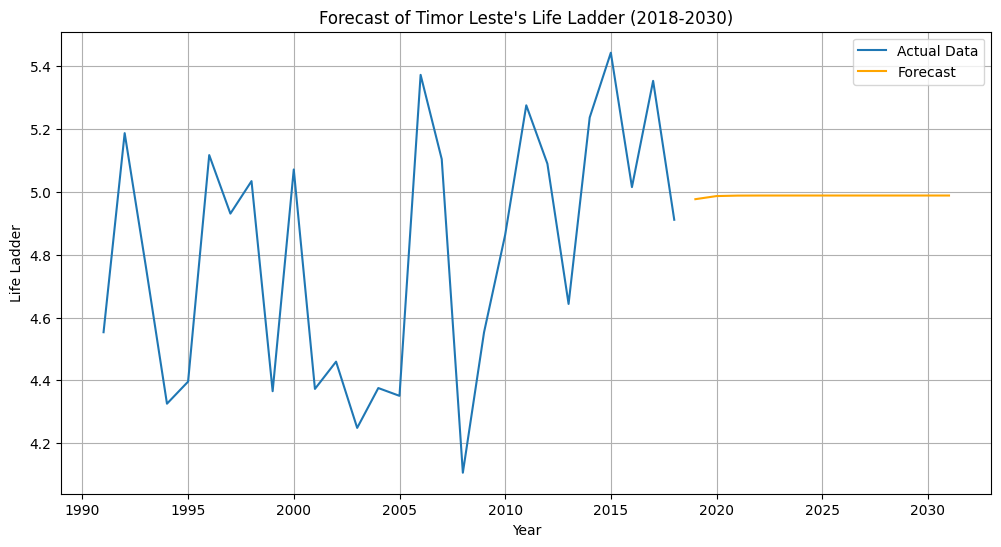

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Konversi life_ladder_list menjadi Series dengan index tahun
years = pd.date_range(start='1990', periods=len(timor_list), freq='Y')
life_ladder_series = pd.Series(timor_list, index=years)

# Misalkan model ARIMA yang sudah kita latih sebelumnya adalah ARIMA(1,1,1)
model = ARIMA(life_ladder_series, order=(1, 1, 1))
model_fit = model.fit()

# Melakukan peramalan untuk 14 tahun ke depan (dari tahun 2018 hingga 2030)
forecast = model_fit.forecast(steps=13)

# Tampilkan hasil peramalan
print("Forecast for Timor Leste's Life Ladder (2018-2030):")
forecast_years = pd.date_range(start='2018-01-01', periods=13, freq='Y')
forecast_arima = pd.DataFrame({'forecast': forecast})
print(forecast_arima)

# Visualisasikan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(life_ladder_series, label='Actual Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Forecast of Timor Leste's Life Ladder (2018-2030)")
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid(True)
plt.show()


## Evaluation Model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Buat DataFrame baru dengan life_ladder_list dan tahun sebagai indeks
timor_df_new = pd.DataFrame({'Life_Ladder': timor_list}, index=years)

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = timor_df_new.index.year.values.reshape(-1, 1)  # Ambil tahun dari indeks DataFrame
y = timor_df_new['Life_Ladder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
forecast_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, forecast_lr)
mape_lr = np.mean(np.abs((y_test - forecast_lr) / y_test)) * 100
rmse_lr = np.sqrt(mean_squared_error(y_test, forecast_lr))


In [52]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = life_ladder_series.index.to_numpy().reshape(-1, 1)  # Menggunakan tahun sebagai fitur
y = life_ladder_series.values  # Life Ladder sebagai target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model SES
model_ses = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit_ses = model_ses.fit()
forecast_ses = fit_ses.forecast(steps=len(X_test))
mae_ses = mean_absolute_error(y_test, forecast_ses)
mape_ses = np.mean(np.abs((y_test - forecast_ses) / y_test)) * 100
rmse_ses = np.sqrt(mean_squared_error(y_test, forecast_ses))

# Model ARIMA
model_arima = ARIMA(y_train, order=(1, 1, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(X_test))
mae_arima = mean_absolute_error(y_test, forecast_arima)
mape_arima = np.mean(np.abs((y_test - forecast_arima) / y_test)) * 100
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))

# Model MA
window_size = 3
timor_df['Moving Average'] = timor_df['Life_Ladder'].rolling(window=window_size, min_periods=1).mean()
actual_data = timor_df['Life_Ladder']
ma_forecast = timor_df['Moving Average']
mae_ma = mean_absolute_error(actual_data, ma_forecast)
mape_ma = np.mean(np.abs((actual_data - ma_forecast) / actual_data)) * 100
rmse_ma = np.sqrt(mean_squared_error(actual_data, ma_forecast))


In [53]:
print(forecast_lr)
print(forecast_ses)
print(forecast_arima)
print(ma_forecast.tail(20))

[4.81312639 5.10947753 4.79460445 5.03538975 4.64642888 4.86869223
 4.96130196 5.05391169 4.85017029]
[4.81826651 4.81078436 4.80330222 4.79582007 4.78833792 4.78085577
 4.77337363 4.76589148 4.75840933]
[4.891466   4.89653257 4.89588347 4.89596663 4.89595597 4.89595734
 4.89595716 4.89595718 4.89595718]
1998-12-31    4.776942
1999-12-31    4.823804
2000-12-31    4.603173
2001-12-31    4.634552
2002-12-31    4.360165
2003-12-31    4.361084
2004-12-31    4.324799
2005-12-31    4.699635
2006-12-31    4.942683
2007-12-31    4.861051
2008-12-31    4.587664
2009-12-31    4.507224
2010-12-31    4.897321
2011-12-31    5.076354
2012-12-31    5.003045
2013-12-31    4.990120
2014-12-31    5.107981
2015-12-31    5.232008
2016-12-31    5.270913
2017-12-31    5.093568
Freq: A-DEC, Name: Moving Average, dtype: float64


In [54]:
# Buat DataFrame untuk menyimpan hasil evaluasi
eval_metrics = pd.DataFrame({
    'Model': ['SES','Linier Regresion', 'Moving Average', 'ARIMA'],
    'MAE': [mae_ses,mae_lr, mae_ma, mae_arima],
    'MAPE (%)': [mape_ses, mape_lr, mape_ma, mape_arima],
    'RMSE': [rmse_ses, rmse_lr, rmse_ma, rmse_arima]
})

# Tampilkan DataFrame evaluasi
print("Evaluation Metrics:")
print(eval_metrics)

Evaluation Metrics:
              Model       MAE  MAPE (%)      RMSE
0               SES  0.338536  7.576608  0.376144
1  Linier Regresion  0.356318  8.107879  0.435857
2    Moving Average  0.234383  4.897414  0.305345
3             ARIMA  0.388136  8.792651  0.444898


In [55]:
print(timor_list)

[4.553214157676135, 5.187320030598047, 4.762446380843111, 4.325522908286716, 4.395901359212828, 5.11744878125668, 4.931012986750818, 5.034521966868728, 4.365290486450857, 5.071598632202178, 4.372629781023447, 4.459428335354167, 4.248437742363563, 4.375386343737382, 4.350571801909671, 5.372946653617666, 5.1045312249, 4.1056743124, 4.5527864429, 4.863210321, 5.2759659048, 5.0898862083, 4.6432837728, 5.2371893385, 5.4434705582, 5.0153655889, 5.353903414750805, 4.911434868784958]


In [56]:

# Data aktual dan prediksi dari masing-masing model
actual_values = [4.863210321, 5.2759659048, 5.0898862083, 4.6432837728, 5.2371893385, 5.4434705582, 5.0153655889, 5.353903414750805, 4.911434868784958]
ses_forecast = [4.81826651, 4.81078436, 4.80330222, 4.79582007, 4.78833792, 4.78085577, 4.77337363, 4.76589148, 4.75840933]
ma_forecast = [4.507224, 4.897321, 5.076354, 5.003045, 4.990120, 5.107981, 5.232008, 5.270913, 5.093568]
lr_forecast = [4.81312639, 5.10947753, 4.79460445, 5.03538975, 4.64642888, 4.86869223, 4.96130196, 5.05391169, 4.85017029]
arima_forecast = [4.891466, 4.89653257, 4.89588347, 4.89596663, 4.89595597, 4.89595734, 4.89595716, 4.89595718, 4.89595718]

# Tanggal mulai dan akhir
start_date = '2009-01-01'
end_date = '2018-01-01'

# Buat range tanggal dari start_date hingga end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')

# Buat DataFrame untuk tabel prediksi dengan kolom tahun
predictions_table = pd.DataFrame({
    'Year': date_range,
    'Actual': actual_values,
    'SES Forecast': forecast_ses,
    'Linier Regresion Forecast' : forecast_lr,
    'MA Forecast': ma_forecast,
    'ARIMA Forecast': forecast_arima
})
# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
predictions_table

Hasil Prediksi:


,Year,Actual,SES Forecast,Linier Regresion Forecast,MA Forecast,ARIMA Forecast
0,2009-12-31,4.863210,4.818267,4.813126,4.507224,4.891466
1,2010-12-31,5.275966,4.810784,5.109478,4.897321,4.896533
2,2011-12-31,5.089886,4.803302,4.794604,5.076354,4.895883
3,2012-12-31,4.643284,4.795820,5.035390,5.003045,4.895967
4,2013-12-31,5.237189,4.788338,4.646429,4.990120,4.895956
5,2014-12-31,5.443471,4.780856,4.868692,5.107981,4.895957
6,2015-12-31,5.015366,4.773374,4.961302,5.232008,4.895957
7,2016-12-31,5.353903,4.765891,5.053912,5.270913,4.895957
8,2017-12-31,4.911435,4.758409,4.850170,5.093568,4.895957
